<div class="alert alert-info">
    
# Исследование данных клиентов

Задача: различным характеристикам клиентов спрогнозировать целевую переменную - открыл ли клиент вклад на предложенных ему условиях или нет.

Целевая переменная
deposit - has the client subscribed a term deposit? (binary: 'yes','no')

Описание данных:  
    
age: количество полных лет  
job: тип занимаемой должности  
marital: семейное положение    
education: образование
default: имеется ли любой вид кредитования?  
housing: имеется ли ипотека?    
loan: имеется ли персональный кредит?  
contact: вид контакта с клиентом   
month: в каком месяце было сделано предыдущее предложение    
day: день месяца было предыдущее предложение   
duration: продолжительность предыдущего общения в секундах.  
campaign: количество контактов по этой маркетинговой кампании с этим клиентов    
pdays: количество дней, прошедших с предыдущего предложения(999 означает, что раньше не предлагали)    
previous: количество контактов с этим лиентов в другие маркетинговые кампании  
poutcome: результат предыдущего предложения   
balance: закодированное название личной числовой характеристики клиента  



<div class="alert alert-info">
    
## Изучение данных из файла

In [ ]:
import pandas as pd
import math
#import calendar
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

Подключаемся к БД и загружаем данные

In [ ]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

--2023-05-24 16:35:00--  https://storage.yandexcloud.net/cloud-certs/CA.pem
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3579 (3.5K) [application/x-x509-ca-cert]
Saving to: ‘/root/.postgresql/root.crt’

/root/.postgresql/r 100%[===================>]   3.50K  --.-KB/s    in 0s      

2023-05-24 16:35:01 (472 MB/s) - ‘/root/.postgresql/root.crt’ saved [3579/3579]



In [ ]:
!sudo apt update && sudo apt install --yes python3 python3-pip && \
!pip3 install psycopg2-binary

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,202 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2,270 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:

In [ ]:
import psycopg2

conn = psycopg2.connect("""
    host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
    port=6432
    sslmode=verify-full
    dbname=db_clients
    user=mlhs_student
    password=mlhs_student
    target_session_attrs=read-write
""")

In [ ]:
query = "SELECT * from public.bank_deposit "

df = pd.read_sql_query(query, conn)

conn.close()

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9195 non-null   float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   9664 non-null   float64
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 1.4+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042.0,1,-1,0,unknown,yes
1,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,NaN,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389.0,1,-1,0,unknown,yes
3,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673.0,2,-1,0,unknown,yes
4,42.0,management,single,tertiary,no,0,yes,yes,unknown,5,may,562.0,2,-1,0,unknown,yes


<div class="alert alert-info">
    
### Вывод

🧑‍🎓 Ира: можно заметить, что всего 2 колонки из 17 содержат пропуски: возраст и продолжительность звонка

<div class="alert alert-info">

## Предобработка данных

In [ ]:
df.isna().sum()

age          1967
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration     1498
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

In [ ]:
all_variables = df.shape[0]

def empty_values(list_column):
    for column in list_column:
        column_nan = df[column].isna().sum()
        column_proportion = column_nan / all_variables * 100
        print('Доля пропущенных значений в столбце', column, '=', column_proportion)
        print()
        #print('Кол-во уникальных значений в столбце', column, '=', df[column].unique())
        #print()

In [ ]:
list_column = ['age', 'duration']

empty_values(list_column)

Доля пропущенных значений в столбце age = 17.622289912202113

Доля пропущенных значений в столбце duration = 13.420533954488443



In [ ]:
print('Кол-во уникальных значений в столбце balcony =', df['pdays'].unique())

Кол-во уникальных значений в столбце balcony = [ -1 166 147  91 170 171 126 182 110 198 174 175  27 128 100 167 122 183
 195 133 178  34  10 163 184 154  99  93   2 272  76 160  90 177 246 238
 196 268 267  92   9  88 189 210  85 261 106  41 294 199 231 239 302 135
 307 323 141 270 320 138 264 316 315 146 328  74 148 341 327 145 266 234
 345 318 274 260 305 254 325 180 343  82 340 181 153   4 349 334 278 176
  87  86 169  83  79   6  13  84 350 259  80 161 164  22 296  66 263 333
  89  78 286 364 188 342 344 337 352 356 295 367 366 359 347 370 284 306
 300 363 288 371 301 292 358 346 368 312 179 329 353 298 372 287 355 374
 375 360 291  95  94  98 186 101 321 357  96  35  97 285 103  81  38  28
 113 293  55 119 109  72 187 120 391  50  67 207 105 314  71 140 104  65
  20  49 386 412 229 385 156 389  63 394  70 185 102 190 116 461 422 457
 403 191 459  69 197 173 271  64 428 392 193 474 475 477 130 283 157 192
 462 131 397 132 129 134 121 107 115  58 114  57 208 335 139 430  52 143
 515

🧑‍🎓 Ира: Можно сразу менять тексовые значения в колонке месяца на числовые, так как нам может пригодиться месяц как признак для модели.

In [ ]:
df['month_num'] = df['month'].apply(lambda x: datetime.datetime.strptime(x, "%b").month)

In [ ]:
df['deposit_num'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


🧑‍🎓 Ира: Заполнить пропуски в столбце возраста можно медианой, а заполнить пропуски в продолжительности вызова можно 0(предполагаю,что если в продолжительности вызова пропуск, то самого вызова попросту не было), но на самом деле не вижу в этом особого смысла, так как если я верно поняла, для построения прогноза нам изначально рекомендуют его удалить: Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

В описании данных указано, что в колонке pdays число 999 означает, что раньше клиенту ничего не предлагали, но я так понимаю это ошибка и вместо 999 это значение -1
  



In [ ]:
df['duration'] = df['duration'].fillna(0.0)

def df_median(list_median):
    for row in list_median:
        df[row] = df[row].fillna(df[row].median())
        
list_median = ['age']

df_median(list_median)


In [ ]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
deposit        0
month_num      0
deposit_num    0
dtype: int64

In [ ]:
#Наверное имеет смысл преобразовать формат, так как в обеих колонках речь идет о целых числах, а не о float
df['age'] = df['age'].astype(int)
df['duration'] = df['duration'].astype(int)


<div class="alert alert-info">

## Исследовательский анализ данных

#### Изучим следующие параметры: возраст, месяц и день недели предыдущего предложения, продолжительность звонка, кол-во дней с предыдущего предложение, кол-во контактов по этому предложению, кол-во контактов в другие кампании

array([[<Axes: title={'center': 'age'}>]], dtype=object)

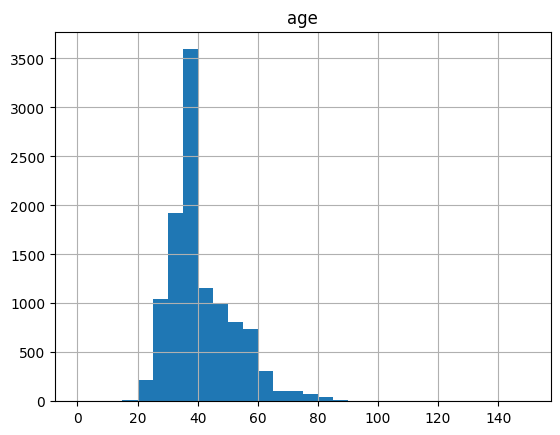

In [ ]:
df.hist('age', range=(0,150), bins=30)

🧑‍🎓 Ира: На данной гистограмме видно, что большая часть клиентов возрастом до 40 лет, хвост после 60 я бы удалила вообще

array([[<Axes: title={'center': 'month_num'}>]], dtype=object)

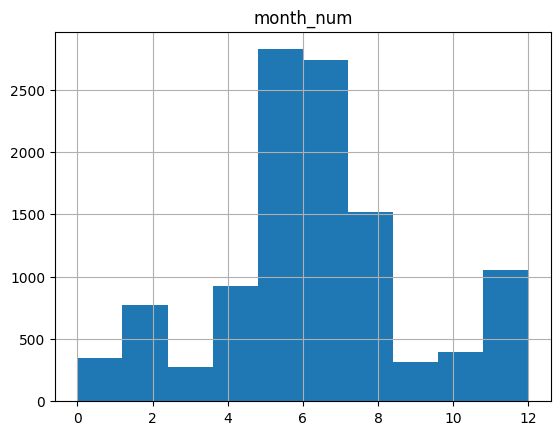

In [ ]:
df.hist('month_num', range=(0,12))

🧑‍🎓 Ира: можно зметить, что большинство кампаний приходится на летние месяцы и на новый год



array([[<Axes: title={'center': 'day'}>]], dtype=object)

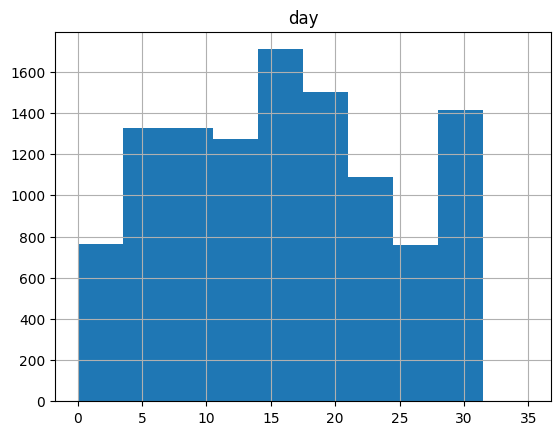

In [ ]:
df.hist('day', range=(0,35))

🧑‍🎓 Ира: особой тенденции не наблюдается, звонки происходят в разные дни с примерно одинаковой частотой

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

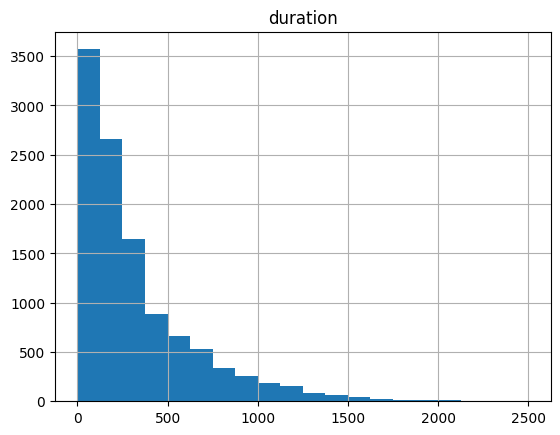

In [ ]:
df.hist('duration', range=(0,2500), bins=20)

🧑‍🎓 Ира: можно заметить, что очень много клиентов, с которыми не созванивались, а если созванивались то разговаривали не очень много. хвост после 1000 секунд я бы отбросила 



array([[<Axes: title={'center': 'campaign'}>]], dtype=object)

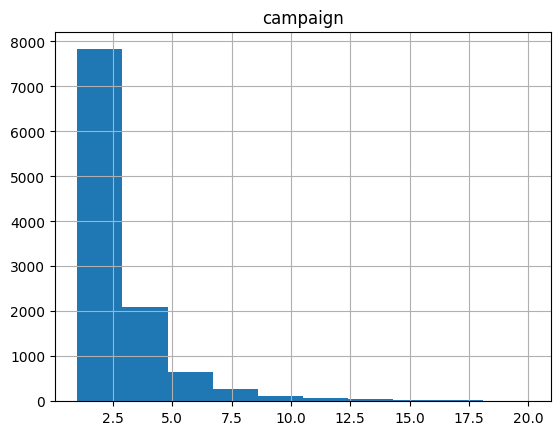

In [ ]:
df.hist('campaign', range=(1,20))

🧑‍🎓 Ира: можно заметить, что по кампании с клиентом созваниваются 1-2 раза в большинстве случаев

array([[<Axes: title={'center': 'pdays'}>]], dtype=object)

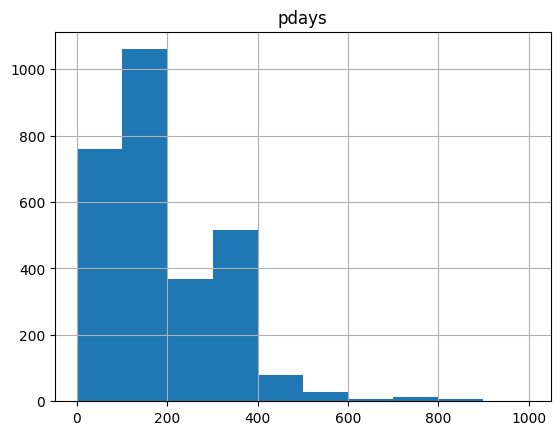

In [ ]:
df.hist('pdays', range=(1,999))

🧑‍🎓 Ира: в основном с предыдущего предложения не проходит больше полугода

array([[<Axes: title={'center': 'previous'}>]], dtype=object)

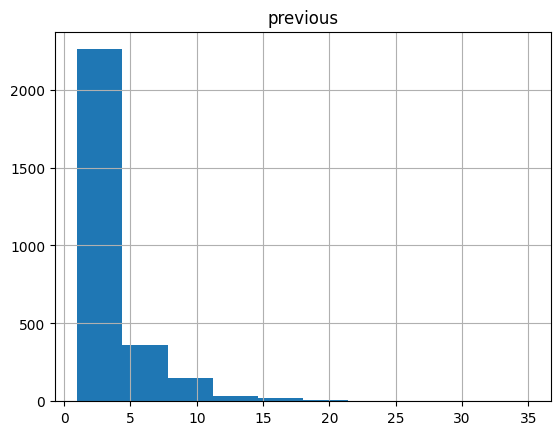

In [ ]:
df.hist('previous', range=(1,35))

🧑‍🎓 Ира: в основном с клиентом было до 5 контактов в предыдущие кампании. хвост после 15 я бы удалила

<div class="alert alert-info">

### Уберем редкие и выбивающиеся значения.

🧑‍🎓 Ира: мы конечно можем удалить выбросы исходя из моих комментариев выше, но сделаем вид, что мы умненькие и удалим по перцентелям :) 

In [ ]:
data = df.query('age <= 60')
data = data[data['duration'] <= np.percentile(data['duration'], [95])[0]]
data = data[data['pdays'] <= np.percentile(data['pdays'], [99])[0]]
data = data[data['previous'] <= np.percentile(data['previous'], [99])[0]]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9936 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          9936 non-null   int64 
 1   job          9936 non-null   object
 2   marital      9936 non-null   object
 3   education    9936 non-null   object
 4   default      9936 non-null   object
 5   balance      9936 non-null   int64 
 6   housing      9936 non-null   object
 7   loan         9936 non-null   object
 8   contact      9936 non-null   object
 9   day          9936 non-null   int64 
 10  month        9936 non-null   object
 11  duration     9936 non-null   int64 
 12  campaign     9936 non-null   int64 
 13  pdays        9936 non-null   int64 
 14  previous     9936 non-null   int64 
 15  poutcome     9936 non-null   object
 16  deposit      9936 non-null   object
 17  month_num    9936 non-null   int64 
 18  deposit_num  9936 non-null   int64 
dtypes: int64(9), object(10)
me

🧑‍🎓 Ира: удалилось всего 2000 строк, мне кажется на этом очистку данных можно закончить

<div class="alert alert-info">
    
### Какие факторы больше всего влияют на целевую переменную

In [ ]:
data.corr()


,age,balance,day,duration,campaign,pdays,previous,month_num,deposit_num
age,1.000000,0.066395,0.012584,-0.003842,0.032803,-0.023559,-0.004694,0.071681,-0.080300
balance,0.066395,1.000000,0.018399,0.018956,-0.008237,0.012842,0.037145,0.079117,0.083770
day,0.012584,0.018399,1.000000,-0.009216,0.142123,-0.101903,-0.076418,0.064039,-0.066093
duration,-0.003842,0.018956,-0.009216,1.000000,-0.068185,0.004551,0.012619,0.005480,0.399790
campaign,0.032803,-0.008237,0.142123,-0.068185,1.000000,-0.101984,-0.079681,0.040255,-0.132574
pdays,-0.023559,0.012842,-0.101903,0.004551,-0.101984,1.000000,0.617373,-0.067096,0.153047
previous,-0.004694,0.037145,-0.076418,0.012619,-0.079681,0.617373,1.000000,-0.000045,0.206080
month_num,0.071681,0.079117,0.064039,0.005480,0.040255,-0.067096,-0.000045,1.000000,0.024781
deposit_num,-0.080300,0.083770,-0.066093,0.399790,-0.132574,0.153047,0.206080,0.024781,1.000000


In [ ]:
#pd.plotting.scatter_matrix(data.corr(), figsize=(10, 10));

🧑‍🎓 Ира:   
Если честно, не очень понятно...
Либо я что-то неверно сделала, либо на нашу целевую переменную особо ничего не влияет...
корреляция между признаками наблюдается только у столбцов pdays и previous, но она меньше 0.85, так что можно не удалять один из столбцов
